<a href="https://colab.research.google.com/github/mateosuster/pythonungs/blob/master/codigos/manipulacion_de_datos/MPE_III_Mate_Financiera_con_Yahoo_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Precios de Bonos con Yahoo Finance


In [1]:
# ============================================================================
# INSTALACIÓN DE LIBRERÍAS
# ============================================================================

# Instalar las librerías necesarias
!pip install yfinance #pandas matplotlib seaborn plotly



# Librerías

In [2]:
# ============================================================================
# IMPORTAR LIBRERÍAS
# ============================================================================

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Versión de yfinance:", yf.__version__)


¡Librerías importadas exitosamente!
Versión de yfinance: 0.2.61


# Introducción a Yahoo Finance

In [18]:
# Ejemplos de diferentes tipos de símbolos
ejemplos_simbolos = {
    'AAPL': 'Acción individual (Apple)',
    'SPY': 'ETF (S&P 500)',
    '^GSPC': 'Índice (S&P 500) - usa ^ para índices',
    '^TNX': 'Rendimiento bono 10 años EE.UU.',
    'GC=F': 'Futuros (Oro) - usa =F para futuros',
    'EURUSD=X': 'Par de divisas - usa =X para forex',
    'BTC-USD': 'Criptomoneda (Bitcoin en USD)'
}

print("\nEjemplos de símbolos en Yahoo Finance:")
for simbolo, descripcion in ejemplos_simbolos.items():
    print(f"  {simbolo:<10} → {descripcion}")

print("\n💡 Nota importante: Los bonos del Tesoro se representan como RENDIMIENTOS (%), no precios")




Ejemplos de símbolos en Yahoo Finance:
  AAPL       → Acción individual (Apple)
  SPY        → ETF (S&P 500)
  ^GSPC      → Índice (S&P 500) - usa ^ para índices
  ^TNX       → Rendimiento bono 10 años EE.UU.
  GC=F       → Futuros (Oro) - usa =F para futuros
  EURUSD=X   → Par de divisas - usa =X para forex
  BTC-USD    → Criptomoneda (Bitcoin en USD)

💡 Nota importante: Los bonos del Tesoro se representan como RENDIMIENTOS (%), no precios


## Descarga

In [19]:
# Ejemplo básico con un bono del Tesoro a 10 años
ticker_ejemplo = '^TNX'
print(f"Descargando datos del bono del Tesoro a 10 años ({ticker_ejemplo})...")

# Crear objeto Ticker
bono_10y = yf.Ticker(ticker_ejemplo)

# Obtener información básica
print("\n🔍 Información básica del instrumento:")
try:
    info = bono_10y.info
    print(f"  Nombre largo: {info.get('longName', 'No disponible')}")
    print(f"  Moneda: {info.get('currency', 'No disponible')}")
    print(f"  Intercambio: {info.get('exchange', 'No disponible')}")
except:
    print("  ℹ️  Información básica no disponible para este tipo de instrumento")

# Descargar datos históricos (últimos 30 días)
datos_ejemplo = bono_10y.history(period='1mo')
print(f"\n📊 Datos descargados: {len(datos_ejemplo)} registros")
print(f"Rango de fechas: {datos_ejemplo.index[0].strftime('%Y-%m-%d')} a {datos_ejemplo.index[-1].strftime('%Y-%m-%d')}")

# Mostrar las primeras filas
print("\n🔢 Primeras 5 observaciones:")
print(datos_ejemplo.head())

# Mostrar las columnas disponibles
print(f"\n📋 Columnas disponibles: {list(datos_ejemplo.columns)}")


Descargando datos del bono del Tesoro a 10 años (^TNX)...

🔍 Información básica del instrumento:
  Nombre largo: CBOE Interest Rate 10 Year T No
  Moneda: USD
  Intercambio: CGI

📊 Datos descargados: 22 registros
Rango de fechas: 2025-04-30 a 2025-05-30

🔢 Primeras 5 observaciones:
                            Open   High    Low  Close  Volume  Dividends  \
Date                                                                       
2025-04-30 00:00:00-05:00  4.139  4.229  4.135  4.177       0        0.0   
2025-05-01 00:00:00-05:00  4.150  4.241  4.124  4.231       0        0.0   
2025-05-02 00:00:00-05:00  4.225  4.332  4.225  4.322       0        0.0   
2025-05-05 00:00:00-05:00  4.301  4.371  4.298  4.343       0        0.0   
2025-05-06 00:00:00-05:00  4.337  4.363  4.306  4.308       0        0.0   

                           Stock Splits  
Date                                     
2025-04-30 00:00:00-05:00           0.0  
2025-05-01 00:00:00-05:00           0.0  
2025-05-02 00:00

## Interpretación de los datos

In [20]:
print("\n📖 Significado de cada columna:")
columnas_info = {
    'Open': 'Precio/rendimiento de apertura del día',
    'High': 'Precio/rendimiento máximo del día',
    'Low': 'Precio/rendimiento mínimo del día',
    'Close': 'Precio/rendimiento de cierre del día',
    'Volume': 'Volumen de transacciones (si aplica)',
    'Dividends': 'Dividendos pagados (si aplica)',
    'Stock Splits': 'División de acciones (si aplica)'
}

for columna, descripcion in columnas_info.items():
    disponible = "✅" if columna in datos_ejemplo.columns else "❌"
    print(f"  {disponible} {columna:<12} → {descripcion}")

# Estadísticas básicas
print(f"\n📈 Estadísticas del período (rendimiento del bono 10Y):")
print(f"  Rendimiento actual: {datos_ejemplo['Close'].iloc[-1]:.2f}%")
print(f"  Rendimiento promedio: {datos_ejemplo['Close'].mean():.2f}%")
print(f"  Rendimiento máximo: {datos_ejemplo['Close'].max():.2f}%")
print(f"  Rendimiento mínimo: {datos_ejemplo['Close'].min():.2f}%")
print(f"  Volatilidad diaria: {datos_ejemplo['Close'].std():.3f}%")


📖 Significado de cada columna:
  ✅ Open         → Precio/rendimiento de apertura del día
  ✅ High         → Precio/rendimiento máximo del día
  ✅ Low          → Precio/rendimiento mínimo del día
  ✅ Close        → Precio/rendimiento de cierre del día
  ✅ Volume       → Volumen de transacciones (si aplica)
  ✅ Dividends    → Dividendos pagados (si aplica)
  ✅ Stock Splits → División de acciones (si aplica)

📈 Estadísticas del período (rendimiento del bono 10Y):
  Rendimiento actual: 4.42%
  Rendimiento promedio: 4.42%
  Rendimiento máximo: 4.60%
  Rendimiento mínimo: 4.18%
  Volatilidad diaria: 0.106%


## Períodos de descarga

In [21]:
periodos_disponibles = {
    '1d': 'Un día',
    '5d': 'Cinco días',
    '1mo': 'Un mes',
    '3mo': 'Tres meses',
    '6mo': 'Seis meses',
    '1y': 'Un año',
    '2y': 'Dos años',
    '5y': 'Cinco años',
    '10y': 'Diez años',
    'ytd': 'Año hasta la fecha',
    'max': 'Máximo disponible'
}

print("\nPeríodos disponibles para history():")
for periodo, descripcion in periodos_disponibles.items():
    print(f"  '{periodo}'  → {descripcion}")

# Ejemplo comparando diferentes períodos
print(f"\n🔄 Comparando diferentes períodos para {ticker_ejemplo}:")

periodos_comparar = ['1mo', '6mo', '1y']
for periodo in periodos_comparar:
    try:
        datos_temp = bono_10y.history(period=periodo)
        if not datos_temp.empty:
            print(f"  {periodo:<4} → {len(datos_temp)} registros, desde {datos_temp.index[0].strftime('%Y-%m-%d')}")
    except Exception as e:
        print(f"  {periodo:<4} → Error: {str(e)}")



Períodos disponibles para history():
  '1d'  → Un día
  '5d'  → Cinco días
  '1mo'  → Un mes
  '3mo'  → Tres meses
  '6mo'  → Seis meses
  '1y'  → Un año
  '2y'  → Dos años
  '5y'  → Cinco años
  '10y'  → Diez años
  'ytd'  → Año hasta la fecha
  'max'  → Máximo disponible

🔄 Comparando diferentes períodos para ^TNX:
  1mo  → 22 registros, desde 2025-04-30
  6mo  → 123 registros, desde 2024-12-02
  1y   → 251 registros, desde 2024-05-30


# Datos

In [3]:

# ============================================================================
# CONFIGURACIÓN DE DATOS
# ============================================================================

# Lista de bonos del Tesoro de EE.UU. más comunes para análisis educativo
BONOS_TESORO = {
    '^TNX': 'Bono del Tesoro 10 años',
    '^TYX': 'Bono del Tesoro 30 años',
    '^FVX': 'Bono del Tesoro 5 años',
    '^IRX': 'Letra del Tesoro 13 semanas (3 meses)',
    'TLT': 'ETF Bonos Largo Plazo (20+ años)',
    'IEF': 'ETF Bonos Mediano Plazo (7-10 años)',
    'SHY': 'ETF Bonos Corto Plazo (1-3 años)'
}

# ETFs de bonos corporativos e internacionales
BONOS_ADICIONALES = {
    'LQD': 'ETF Bonos Corporativos Investment Grade',
    'HYG': 'ETF Bonos High Yield (Alto Rendimiento)',
    'EMB': 'ETF Bonos Emergentes USD',
    'AGG': 'ETF Bonos Agregados EE.UU.'
}

# Combinar todos los bonos
TODOS_BONOS = {**BONOS_TESORO, **BONOS_ADICIONALES}

print("Instrumentos disponibles para análisis:")
for ticker, nombre in TODOS_BONOS.items():
    print(f"  {ticker}: {nombre}")


Instrumentos disponibles para análisis:
  ^TNX: Bono del Tesoro 10 años
  ^TYX: Bono del Tesoro 30 años
  ^FVX: Bono del Tesoro 5 años
  ^IRX: Letra del Tesoro 13 semanas (3 meses)
  TLT: ETF Bonos Largo Plazo (20+ años)
  IEF: ETF Bonos Mediano Plazo (7-10 años)
  SHY: ETF Bonos Corto Plazo (1-3 años)
  LQD: ETF Bonos Corporativos Investment Grade
  HYG: ETF Bonos High Yield (Alto Rendimiento)
  EMB: ETF Bonos Emergentes USD
  AGG: ETF Bonos Agregados EE.UU.


In [4]:

# ============================================================================
# FUNCIONES AUXILIARES
# ============================================================================

def descargar_datos_bono(ticker, periodo='1y'):
    """
    Descarga datos históricos de un bono específico

    Parámetros:
    ticker (str): Símbolo del bono en Yahoo Finance
    periodo (str): Período de descarga ('1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max')

    Retorna:
    DataFrame: Datos históricos del bono
    """
    try:
        bono = yf.Ticker(ticker)
        datos = bono.history(period=periodo)
        if datos.empty:
            print(f"⚠️  No se encontraron datos para {ticker}")
            return None
        print(f"✅ Datos descargados para {ticker}: {len(datos)} registros")
        return datos
    except Exception as e:
        print(f"❌ Error descargando {ticker}: {str(e)}")
        return None

def calcular_metricas_bono(datos):
    """
    Calcula métricas básicas para análisis de bonos

    Parámetros:
    datos (DataFrame): Datos históricos del bono

    Retorna:
    dict: Diccionario con métricas calculadas
    """
    if datos is None or datos.empty:
        return None

    precio_actual = datos['Close'].iloc[-1]
    precio_inicial = datos['Close'].iloc[0]

    metricas = {
        'precio_actual': precio_actual,
        'precio_inicial': precio_inicial,
        'rendimiento_total': ((precio_actual - precio_inicial) / precio_inicial) * 100,
        'precio_maximo': datos['Close'].max(),
        'precio_minimo': datos['Close'].min(),
        'volatilidad': datos['Close'].pct_change().std() * np.sqrt(252) * 100,  # Volatilidad anualizada
        'volumen_promedio': datos['Volume'].mean() if 'Volume' in datos.columns else 0
    }

    return metricas


# Análisis básico

In [13]:

# ============================================================================
# EJERCICIO 1: DESCARGA Y ANÁLISIS BÁSICO DE UN BONO
# ============================================================================

print("\n" + "="*60)
print("EJERCICIO 1: ANÁLISIS BÁSICO DE BONOS DEL TESORO")
print("="*60)

# Seleccionar bonos del Tesoro para análisis
bonos_tesoro_analizar = ['^TNX', '^TYX', '^FVX']

# Descargar datos
datos_bonos = {}
for ticker in bonos_tesoro_analizar:
    print(f"\nDescargando datos para {ticker} ({BONOS_TESORO[ticker]})...")
    datos_bonos[ticker] = descargar_datos_bono(ticker, '2y')




EJERCICIO 1: ANÁLISIS BÁSICO DE BONOS DEL TESORO

Descargando datos para ^TNX (Bono del Tesoro 10 años)...
✅ Datos descargados para ^TNX: 503 registros

Descargando datos para ^TYX (Bono del Tesoro 30 años)...
✅ Datos descargados para ^TYX: 503 registros

Descargando datos para ^FVX (Bono del Tesoro 5 años)...
✅ Datos descargados para ^FVX: 503 registros


In [16]:
datos_bonos.keys()

dict_keys(['^TNX', '^TYX', '^FVX'])

In [17]:
datos_bonos['^TNX']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-30 00:00:00-05:00,3.712,3.754,3.685,3.700,0,0.0,0.0
2023-05-31 00:00:00-05:00,3.646,3.691,3.631,3.637,0,0.0,0.0
2023-06-01 00:00:00-05:00,3.650,3.658,3.570,3.608,0,0.0,0.0
2023-06-02 00:00:00-05:00,3.620,3.700,3.612,3.691,0,0.0,0.0
2023-06-05 00:00:00-05:00,3.753,3.758,3.658,3.693,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-23 00:00:00-05:00,4.473,4.527,4.465,4.509,0,0.0,0.0
2025-05-27 00:00:00-05:00,4.469,4.487,4.432,4.434,0,0.0,0.0
2025-05-28 00:00:00-05:00,4.444,4.501,4.438,4.477,0,0.0,0.0


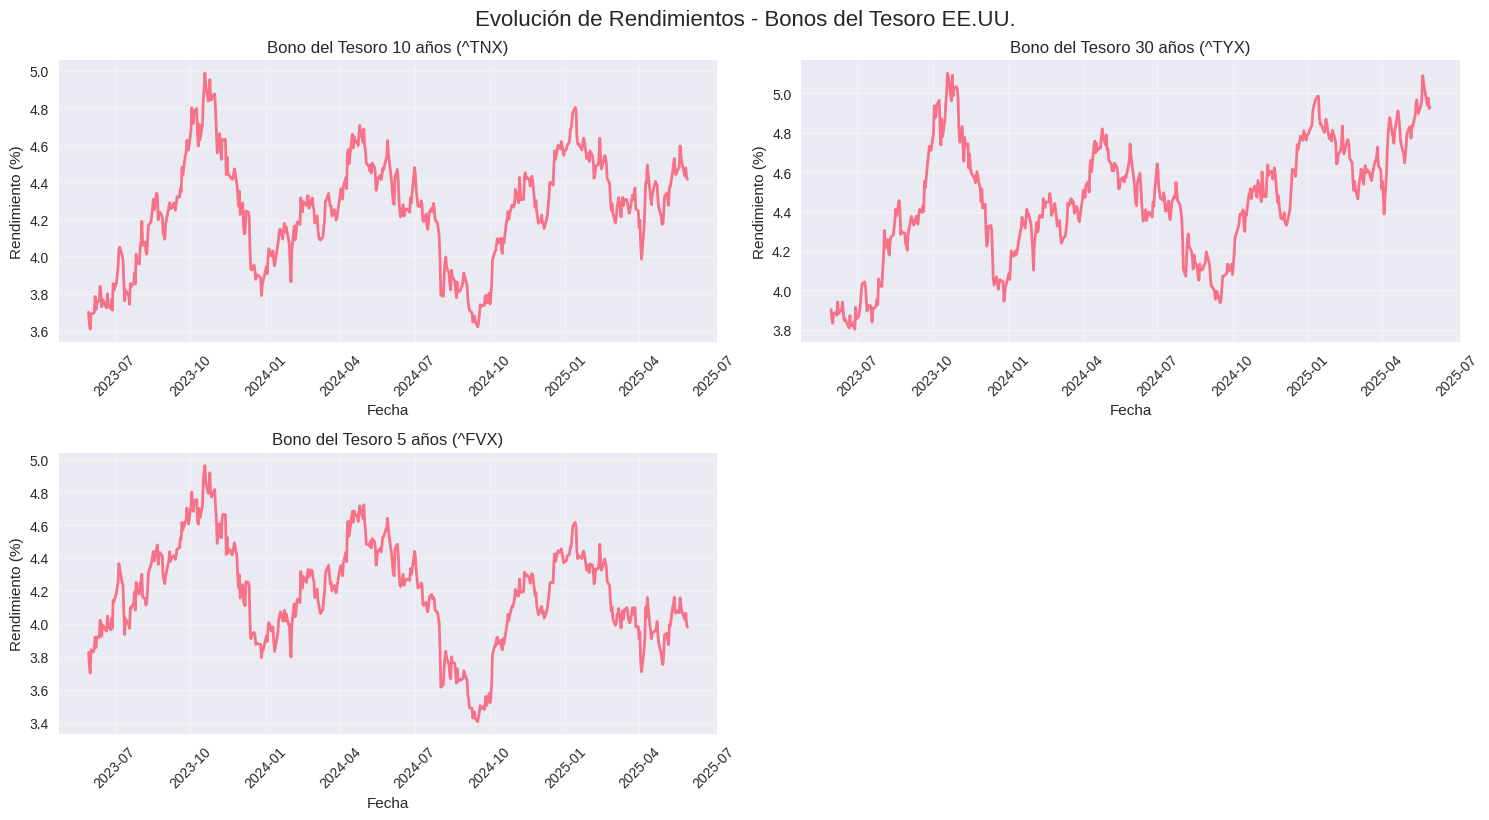

In [15]:
# Crear gráfico comparativo
plt.figure(figsize=(15, 8))

for i, (ticker, datos) in enumerate(datos_bonos.items()):
    if datos is not None:
        plt.subplot(2, 2, i+1)
        plt.plot(datos.index, datos['Close'], linewidth=2, label=BONOS_TESORO[ticker])
        plt.title(f'{BONOS_TESORO[ticker]} ({ticker})')
        plt.xlabel('Fecha')
        plt.ylabel('Rendimiento (%)')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Evolución de Rendimientos - Bonos del Tesoro EE.UU.', fontsize=16, y=1.02)
plt.show()


# Análisis de métricas

In [6]:

# ============================================================================
# EJERCICIO 2: ANÁLISIS DE MÉTRICAS
# ============================================================================

print("\n" + "="*60)
print("EJERCICIO 2: CÁLCULO DE MÉTRICAS DE BONOS")
print("="*60)

# Calcular métricas para cada bono
print("\n📊 RESUMEN DE MÉTRICAS:")
print("-" * 80)
print(f"{'Instrumento':<25} {'Precio Actual':<12} {'Rendimiento %':<12} {'Volatilidad %':<12}")
print("-" * 80)

metricas_bonos = {}
for ticker, datos in datos_bonos.items():
    if datos is not None:
        metricas = calcular_metricas_bono(datos)
        metricas_bonos[ticker] = metricas
        nombre = BONOS_TESORO[ticker][:20] + "..." if len(BONOS_TESORO[ticker]) > 20 else BONOS_TESORO[ticker]
        print(f"{nombre:<25} {metricas['precio_actual']:<12.2f} {metricas['rendimiento_total']:<12.2f} {metricas['volatilidad']:<12.2f}")



EJERCICIO 2: CÁLCULO DE MÉTRICAS DE BONOS

📊 RESUMEN DE MÉTRICAS:
--------------------------------------------------------------------------------
Instrumento               Precio Actual Rendimiento % Volatilidad %
--------------------------------------------------------------------------------
Bono del Tesoro 10 a...   4.42         19.35        23.57       
Bono del Tesoro 30 a...   4.93         26.29        20.42       
Bono del Tesoro 5 añ...   3.98         4.00         25.81       


# Curva de rendimiento


EJERCICIO 3: CURVA DE RENDIMIENTOS
Construyendo curva de rendimientos actual...
  3M: 4.23%
  5Y: 3.98%
  10Y: 4.42%
  30Y: 4.93%


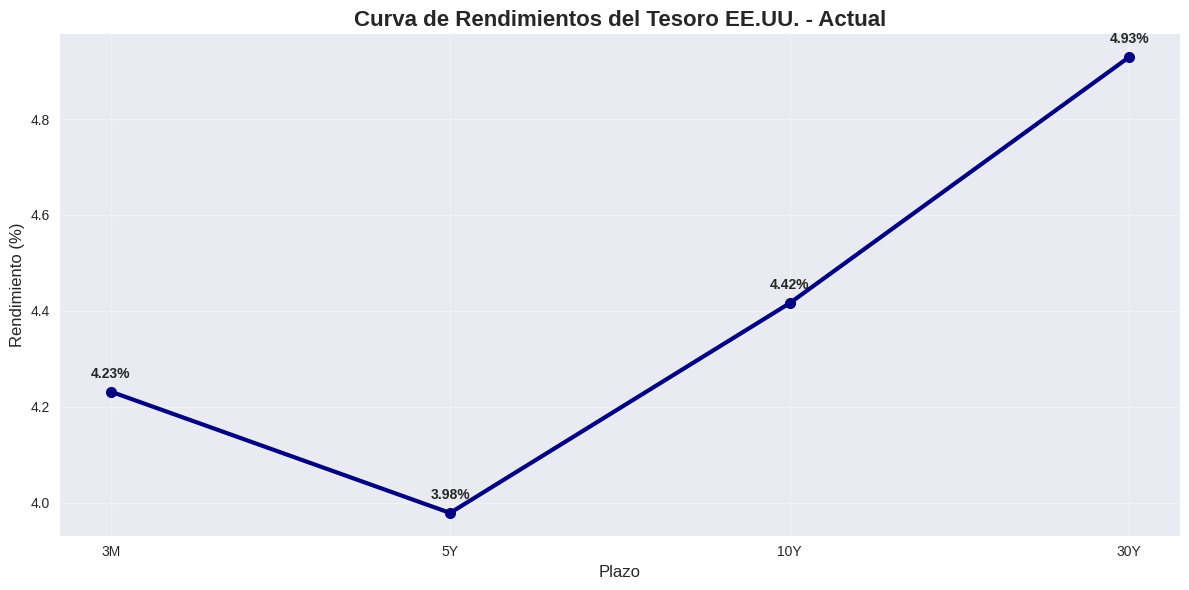

In [7]:

# ============================================================================
# EJERCICIO 3: COMPARACIÓN DE CURVA DE RENDIMIENTOS
# ============================================================================

print("\n" + "="*60)
print("EJERCICIO 3: CURVA DE RENDIMIENTOS")
print("="*60)

# Obtener datos actuales para la curva de rendimientos
curva_rendimientos = {}
plazos = ['3M', '5Y', '10Y', '30Y']
tickers_curva = ['^IRX', '^FVX', '^TNX', '^TYX']

print("Construyendo curva de rendimientos actual...")
for plazo, ticker in zip(plazos, tickers_curva):
    try:
        bono = yf.Ticker(ticker)
        info = bono.history(period='5d')
        if not info.empty:
            curva_rendimientos[plazo] = info['Close'].iloc[-1]
            print(f"  {plazo}: {curva_rendimientos[plazo]:.2f}%")
    except:
        print(f"  ⚠️  No se pudo obtener datos para {plazo}")

# Graficar curva de rendimientos
if curva_rendimientos:
    plt.figure(figsize=(12, 6))

    plazos_disponibles = list(curva_rendimientos.keys())
    rendimientos = list(curva_rendimientos.values())

    plt.plot(plazos_disponibles, rendimientos, 'o-', linewidth=3, markersize=8, color='navy')
    plt.title('Curva de Rendimientos del Tesoro EE.UU. - Actual', fontsize=16, fontweight='bold')
    plt.xlabel('Plazo', fontsize=12)
    plt.ylabel('Rendimiento (%)', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Añadir valores en los puntos
    for i, (plazo, rendimiento) in enumerate(zip(plazos_disponibles, rendimientos)):
        plt.annotate(f'{rendimiento:.2f}%',
                    (i, rendimiento),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=10,
                    fontweight='bold')

    plt.tight_layout()
    plt.show()


# Análisis de ETFs de Bonos


EJERCICIO 4: ANÁLISIS DE ETFs DE BONOS
Analizando ETFs de bonos (período: 1y)...
Descargando TLT...
✅ Datos descargados para TLT: 250 registros
Descargando IEF...
✅ Datos descargados para IEF: 250 registros
Descargando SHY...
✅ Datos descargados para SHY: 250 registros
Descargando LQD...
✅ Datos descargados para LQD: 250 registros


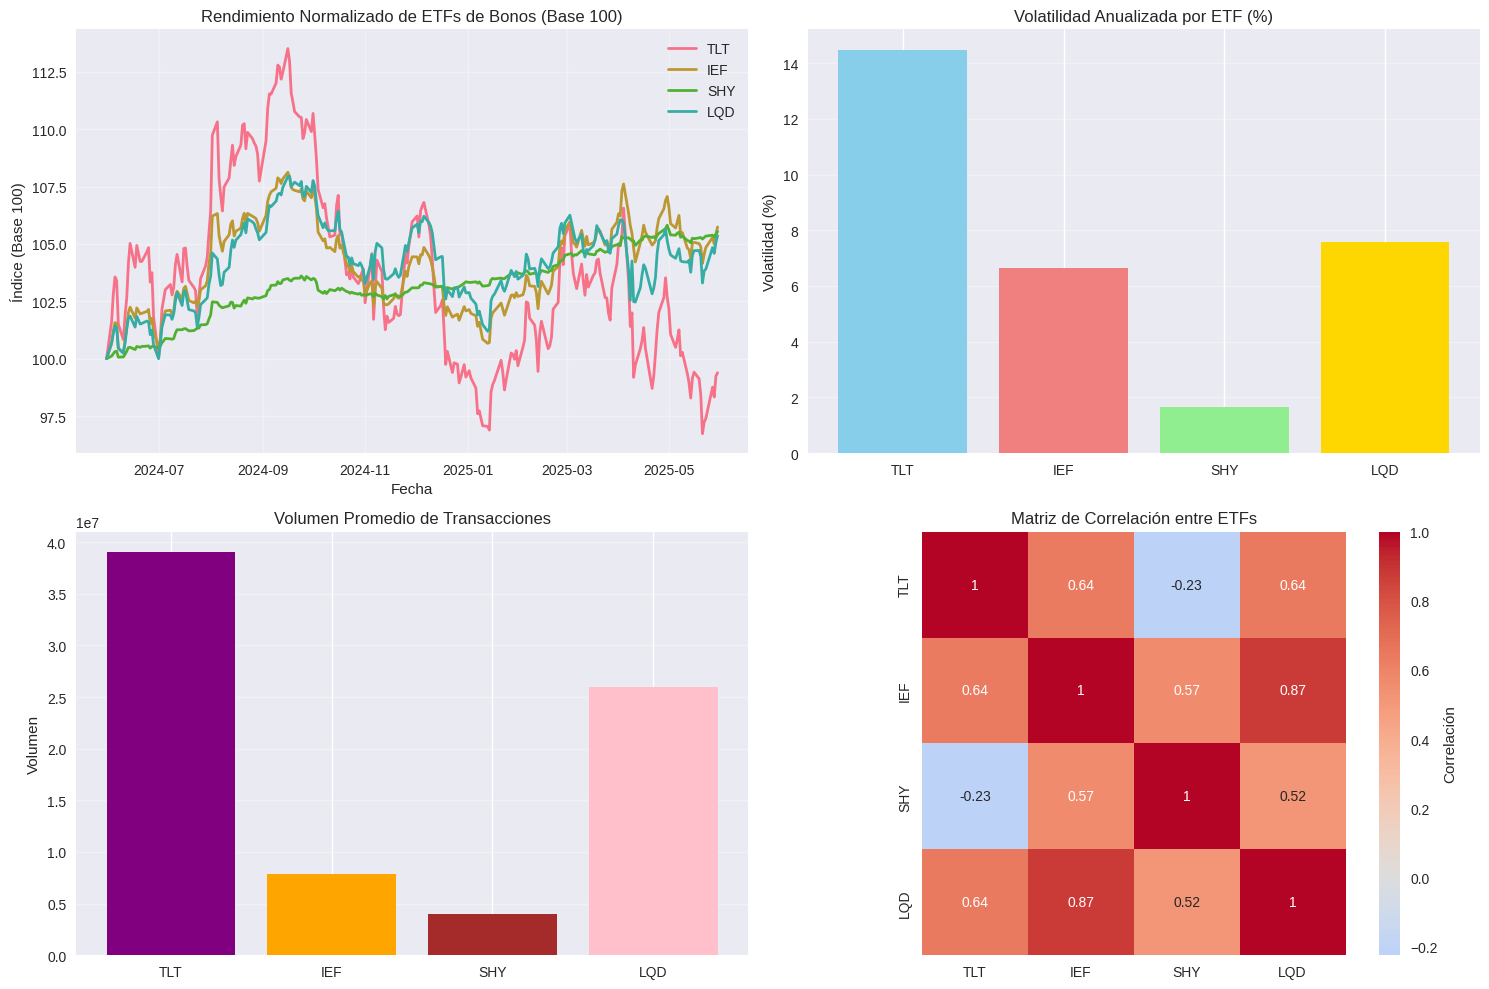

In [8]:

# ============================================================================
# EJERCICIO 4: ANÁLISIS DE ETFs DE BONOS
# ============================================================================

print("\n" + "="*60)
print("EJERCICIO 4: ANÁLISIS DE ETFs DE BONOS")
print("="*60)

# Seleccionar ETFs para análisis
etfs_bonos = ['TLT', 'IEF', 'SHY', 'LQD']
periodo_analisis = '1y'

print(f"Analizando ETFs de bonos (período: {periodo_analisis})...")

# Descargar datos de ETFs
datos_etfs = {}
for ticker in etfs_bonos:
    print(f"Descargando {ticker}...")
    datos_etfs[ticker] = descargar_datos_bono(ticker, periodo_analisis)

# Crear gráfico comparativo de rendimientos
plt.figure(figsize=(15, 10))

# Gráfico 1: Precios normalizados
plt.subplot(2, 2, 1)
for ticker, datos in datos_etfs.items():
    if datos is not None:
        precios_normalizados = (datos['Close'] / datos['Close'].iloc[0]) * 100
        plt.plot(datos.index, precios_normalizados, linewidth=2, label=f"{ticker}")

plt.title('Rendimiento Normalizado de ETFs de Bonos (Base 100)')
plt.xlabel('Fecha')
plt.ylabel('Índice (Base 100)')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Volatilidad
plt.subplot(2, 2, 2)
volatilidades = []
nombres_etfs = []

for ticker, datos in datos_etfs.items():
    if datos is not None:
        vol = datos['Close'].pct_change().std() * np.sqrt(252) * 100
        volatilidades.append(vol)
        nombres_etfs.append(ticker)

plt.bar(nombres_etfs, volatilidades, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Volatilidad Anualizada por ETF (%)')
plt.ylabel('Volatilidad (%)')
plt.grid(True, alpha=0.3, axis='y')

# Gráfico 3: Volumen promedio
plt.subplot(2, 2, 3)
volumenes = []
nombres_vol = []

for ticker, datos in datos_etfs.items():
    if datos is not None and 'Volume' in datos.columns:
        vol_promedio = datos['Volume'].mean()
        volumenes.append(vol_promedio)
        nombres_vol.append(ticker)

if volumenes:
    plt.bar(nombres_vol, volumenes, color=['purple', 'orange', 'brown', 'pink'])
    plt.title('Volumen Promedio de Transacciones')
    plt.ylabel('Volumen')
    plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    plt.grid(True, alpha=0.3, axis='y')

# Gráfico 4: Correlación
plt.subplot(2, 2, 4)
if len(datos_etfs) > 1:
    # Crear DataFrame con precios de cierre
    df_precios = pd.DataFrame()
    for ticker, datos in datos_etfs.items():
        if datos is not None:
            df_precios[ticker] = datos['Close']

    if not df_precios.empty:
        correlacion = df_precios.corr()
        sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0,
                   square=True, cbar_kws={'label': 'Correlación'})
        plt.title('Matriz de Correlación entre ETFs')

plt.tight_layout()
plt.show()


# Análisis interactivo

In [9]:

# ============================================================================
# EJERCICIO 5: ANÁLISIS INTERACTIVO CON PLOTLY
# ============================================================================

print("\n" + "="*60)
print("EJERCICIO 5: GRÁFICOS INTERACTIVOS")
print("="*60)

# Crear gráfico interactivo con Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Precios de ETFs de Bonos', 'Distribución de Rendimientos',
                   'Volumen de Transacciones', 'Rendimientos vs Volatilidad'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# Gráfico 1: Líneas de tiempo
for ticker, datos in datos_etfs.items():
    if datos is not None:
        fig.add_trace(
            go.Scatter(x=datos.index, y=datos['Close'],
                      name=f'{ticker}', mode='lines'),
            row=1, col=1
        )

# Gráfico 2: Histograma de rendimientos diarios
for ticker, datos in datos_etfs.items():
    if datos is not None:
        rendimientos_diarios = datos['Close'].pct_change().dropna() * 100
        fig.add_trace(
            go.Histogram(x=rendimientos_diarios, name=f'{ticker} Returns',
                        opacity=0.7, nbinsx=30),
            row=1, col=2
        )

# Gráfico 3: Volumen
for ticker, datos in datos_etfs.items():
    if datos is not None and 'Volume' in datos.columns:
        fig.add_trace(
            go.Scatter(x=datos.index, y=datos['Volume'],
                      name=f'{ticker} Volume', mode='lines'),
            row=2, col=1
        )

# Gráfico 4: Scatter plot rendimiento vs volatilidad
rendimientos_anuales = []
volatilidades_anuales = []
nombres_scatter = []

for ticker, datos in datos_etfs.items():
    if datos is not None:
        rend_anual = ((datos['Close'].iloc[-1] / datos['Close'].iloc[0]) - 1) * 100
        vol_anual = datos['Close'].pct_change().std() * np.sqrt(252) * 100
        rendimientos_anuales.append(rend_anual)
        volatilidades_anuales.append(vol_anual)
        nombres_scatter.append(ticker)

fig.add_trace(
    go.Scatter(x=volatilidades_anuales, y=rendimientos_anuales,
              mode='markers+text', text=nombres_scatter,
              textposition="top center", name='ETFs',
              marker=dict(size=12, color='red')),
    row=2, col=2
)

# Actualizar layout
fig.update_layout(
    title_text="Dashboard Interactivo - Análisis de ETFs de Bonos",
    title_x=0.5,
    height=800,
    showlegend=True
)

fig.update_xaxes(title_text="Fecha", row=1, col=1)
fig.update_yaxes(title_text="Precio ($)", row=1, col=1)

fig.update_xaxes(title_text="Rendimiento Diario (%)", row=1, col=2)
fig.update_yaxes(title_text="Frecuencia", row=1, col=2)

fig.update_xaxes(title_text="Fecha", row=2, col=1)
fig.update_yaxes(title_text="Volumen", row=2, col=1)

fig.update_xaxes(title_text="Volatilidad Anual (%)", row=2, col=2)
fig.update_yaxes(title_text="Rendimiento Anual (%)", row=2, col=2)

fig.show()



EJERCICIO 5: GRÁFICOS INTERACTIVOS


# Resumen final

In [10]:

# ============================================================================
# EJERCICIO 6: TABLA RESUMEN FINAL
# ============================================================================

print("\n" + "="*60)
print("EJERCICIO 6: TABLA RESUMEN EJECUTIVO")
print("="*60)

# Crear tabla resumen completa
resumen_final = []

for ticker in etfs_bonos:
    if ticker in datos_etfs and datos_etfs[ticker] is not None:
        datos = datos_etfs[ticker]
        precio_actual = datos['Close'].iloc[-1]
        precio_inicial = datos['Close'].iloc[0]
        rendimiento = ((precio_actual - precio_inicial) / precio_inicial) * 100
        volatilidad = datos['Close'].pct_change().std() * np.sqrt(252) * 100
        precio_max = datos['Close'].max()
        precio_min = datos['Close'].min()

        resumen_final.append({
            'ETF': ticker,
            'Nombre': TODOS_BONOS.get(ticker, 'N/A'),
            'Precio Actual': f'${precio_actual:.2f}',
            'Rendimiento (%)': f'{rendimiento:.2f}%',
            'Volatilidad (%)': f'{volatilidad:.2f}%',
            'Precio Máximo': f'${precio_max:.2f}',
            'Precio Mínimo': f'${precio_min:.2f}'
        })

# Convertir a DataFrame y mostrar
df_resumen = pd.DataFrame(resumen_final)
print("\n📋 RESUMEN EJECUTIVO - ETFs DE BONOS")
print("=" * 100)
print(df_resumen.to_string(index=False))



EJERCICIO 6: TABLA RESUMEN EJECUTIVO

📋 RESUMEN EJECUTIVO - ETFs DE BONOS
ETF                                  Nombre Precio Actual Rendimiento (%) Volatilidad (%) Precio Máximo Precio Mínimo
TLT        ETF Bonos Largo Plazo (20+ años)        $86.28          -0.61%          14.49%        $98.54        $83.97
IEF     ETF Bonos Mediano Plazo (7-10 años)        $94.57           5.74%           6.65%        $96.70        $89.44
SHY        ETF Bonos Corto Plazo (1-3 años)        $82.65           5.55%           1.66%        $82.86        $78.31
LQD ETF Bonos Corporativos Investment Grade       $107.77           5.36%           7.58%       $110.42       $102.29


# Preguntas

**1.** ¿Qué relación se observa entre el plazo de los bonos y su volatilidad?

**2.** ¿Cómo se comporta la curva de rendimientos? ¿Es normal o invertida?

**3.** ¿Qué ETF de bonos tuvo mejor rendimiento ajustado por riesgo?

**4.** ¿Cómo afectan los cambios en las tasas de interés a los diferentes tipos de bonos?

**5.** ¿Qué ventajas tienen los ETFs de bonos sobre los bonos individuales?

**6.** ¿Cómo se interpreta la correlación entre diferentes ETFs de bonos?

**7.** ¿Qué factores económicos podrían explicar los movimientos observados?

# 📚 Recursos Adicionales

- **Documentación de yfinance:** https://pypi.org/project/yfinance/
- **Yahoo Finance:** https://finance.yahoo.com
- **Datos del Tesoro EE.UU.:** https://www.treasury.gov